In [69]:
# notebook to recreate Mingkang's simulation of qubit-SNAIL coupling gates
# using my refactored version of his code

In [70]:
import numpy as np
from qutip import Options
import qutip as qt
import matplotlib.pyplot as plt
from quantum_logical.pulsesim import QuantumSystem, Pulse
from quantum_logical.pulsesim.mode import QubitMode, SNAILMode

opts = Options(nsteps=1e6, atol=1e-8, rtol=1e-6)
p_bar = qt.ui.TextProgressBar()  # None

# %matplotlib widget

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interactive, Output

# Initial qubit frequencies and SNAIL frequency
freqs = np.array([4, 6, 4.665925])  # q1, q2, q3 frequencies
snail_freq = 5.6675931  # SNAIL frequency


# Adjust qubit frequencies based on a shrink factor
def adjust_frequencies(freqs, snail_freq, shrink_factor):
    # Combine the frequencies and the SNAIL frequency into one array
    all_freqs = np.append(freqs, snail_freq)

    # Calculate the midpoint of all frequencies including the SNAIL frequency
    midpoint = np.mean(all_freqs)

    # Translate all frequencies to the origin (midpoint becomes the new origin)
    translated_freqs = all_freqs - midpoint

    # Apply the shrink factor (scaling about the new origin)
    scaled_freqs = translated_freqs * shrink_factor

    # Translate all frequencies back to the original location
    adjusted_freqs = scaled_freqs + midpoint

    # Separate the qubit frequencies from the SNAIL frequency
    adjusted_qubit_freqs = adjusted_freqs[:-1]
    adjusted_snail_freq = adjusted_freqs[-1]

    return adjusted_qubit_freqs, adjusted_snail_freq


# # Visualization function with annotations and color coding, adjusted for two plots
# def visualize_frequency_changes(shrink_factor):
#     plt.close("all")  # Ensure clean slate for interactive updates
#     fig, (ax1, ax2) = plt.subplots(
#         1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [1, 1]}
#     )

#     adjusted_freqs, adjusted_snail = adjust_frequencies(
#         freqs, snail_freq, shrink_factor
#     )
#     colors = ["red", "green", "blue", "purple"]
#     qubit_labels = ["q1", "q2", "q3", "SNAIL"]

#     # Plot 1: Qubit and SNAIL frequencies with initial frequencies in dashed lines
#     ax1.clear()
#     for i, f in enumerate(freqs):
#         ax1.plot(
#             [f, f],
#             [0, 1],
#             ":",
#             lw=1,
#             color=colors[i],
#             label=f"{qubit_labels[i]} Initial",
#         )
#         ax1.text(f, 1.1, f"{f:.4f} GHz", ha="center", color=colors[i], fontsize=8)
#     for i, af in enumerate(adjusted_freqs):
#         ax1.plot([af, af], [0, 1], "-", lw=2, color=colors[i])
#         ax1.text(af, -0.1, f"{af:.4f} GHz", ha="center", color=colors[i], fontsize=8)
#     ax1.plot(
#         [adjusted_snail, adjusted_snail],
#         [0, 1],
#         "-",
#         lw=2,
#         color=colors[-1],
#         label="SNAIL",
#     )
#     ax1.text(
#         adjusted_snail,
#         1.1,
#         f"{adjusted_snail:.4f} GHz",
#         ha="center",
#         color=colors[-1],
#         fontsize=8,
#     )
#     ax1.set_ylim(-0.2, 1.2)
#     ax1.set_title("Qubit & SNAIL Frequencies")
#     ax1.axes.yaxis.set_visible(False)
#     ax1.set_xlabel("Frequency (GHz)")

#     # Plot 2: Frequency differences as frequencies
#     ax2.clear()
#     # Qubit-qubit differences with thicker lines
#     for i in range(len(adjusted_freqs)):
#         for j in range(i + 1, len(adjusted_freqs)):
#             delta = np.abs(adjusted_freqs[i] - adjusted_freqs[j])
#             ax2.plot(
#                 [delta, delta], [0, 1], "--", lw=2, color=colors[i]
#             )  # First qubit color
#             ax2.plot(
#                 [delta + 0.0025, delta + 0.0025], [0, 1], "--", lw=2, color=colors[j]
#             )  # Second qubit color, slightly offset
#     # Qubit-SNAIL differences in a consistent color
#     for i in range(len(adjusted_freqs)):
#         delta_snail = np.abs(adjusted_freqs[i] - adjusted_snail)
#         ax2.plot(
#             [delta_snail, delta_snail],
#             [0, 1],
#             "-.",
#             lw=1,
#             color=colors[-1],
#             label=f"Δ{qubit_labels[i]}-SNAIL",
#         )
#     ax2.set_title("Frequency Differences")
#     ax2.axes.yaxis.set_visible(False)
#     ax2.set_xlabel("Frequency (GHz)")

#     plt.tight_layout()
#     # plt.legend(loc="upper right")
#     plt.show()


# # Interactive widget setup
# interactive_plot = interactive(
#     visualize_frequency_changes, shrink_factor=(0.0, 1.0, 0.01)
# )
# output = Output()
# display(interactive_plot)

In [72]:
# Initial qubit frequencies and SNAIL frequency
freqs = np.array([4, 6, 4.665925])  # q1, q2, q3 frequencies
snail_freq = 5.6675931  # SNAIL frequency

adjusted_freqs, adjusted_snail = adjust_frequencies(
    freqs, snail_freq, shrink_factor=1.0
)
adjusted_freqs, adjusted_snail

(array([4.      , 6.      , 4.665925]), 5.6675931)

In [73]:
adjusted_snail = 4.27515
adjusted_freqs = np.array([5.06167, 4.54944, 4.16829])

In [74]:
qubit1 = QubitMode(
    name="q1", dim=2, freq=adjusted_freqs[0], alpha=-0.161, T1=1e2, T2=5e1
)
qubit2 = QubitMode(
    name="q2", dim=2, freq=adjusted_freqs[1], alpha=-0.1275, T1=1e2, T2=5e1
)
qubit3 = QubitMode(
    name="q3", dim=2, freq=adjusted_freqs[2], alpha=-0.160, T1=1e2, T2=5e1
)
qubits = [qubit1, qubit2, qubit3]
snail = SNAILMode(name="s", freq=adjusted_snail, g3=0.3, dim=10, T1=1e3, T2=5e2)
_couplings = {
    frozenset([qubit1, snail]): 2 * np.pi * 0.05467,
    frozenset([qubit2, snail]): 2 * np.pi * 0.0435,
    frozenset([qubit3, snail]): 2 * np.pi * 0.04875,
}

qs = QuantumSystem(qubits + [snail], couplings=_couplings)

# get dressed frequencies
qubit_freqs = [qs.dressed_freqs.get(q) for q in qubits]

In [75]:
# Step 1. construct the linear Hamiltonian
HL = 0
# for m in qs.modes:
#     HL += m.freq * qs.modes_num[m]

HL += snail.freq * qs.modes_num[snail]

# Step 2. construct the non-linear part of the Hamiltonian
# add the SNAIL non-linearity
HNl = snail.g3 / 6 * (qs.modes_field[snail]) ** 3
for q in qubits:
    # HNl += q.alpha / 12 * (qs.modes_field[q]) ** 2
    HNl -= q.freq * (qs.modes_Z[q] / 2)

# Step 3. Add the coupling terms
Hc = 0
for c, g in qs.couplings.items():
    q1, q2 = c
    Hc += g * (qs.modes_field[q1] * qs.modes_field[q2])

H0 = HL + HNl + Hc

# pump_term = qs.modes_a_dag[snail] - qs.modes_a[snail]
pump_term = qs.modes_a_dag[snail] + qs.modes_a[snail]

In [76]:
# create an initial state
# psi0 = qs.prepare_tensor_fock_state([(qubit2, 1)])
eigenvalues, eigenvectors = H0.eigenstates()
psi0 = eigenvectors[3]  # [2] for 2 qubits+snail

In [77]:
# define desired unitary and expected final state
# assumes the iSWAP is on qubit1 and qubit2
# U = qt.tensor(
#     qt.qip.operations.iswap(N=2), qt.identity(qubit3.dim), qt.identity(snail.dim)
# )
U = qt.qip.operations.iswap(N=2)

psi0_rho = qt.ptrace(psi0, [0, 1])
expected_psi = qt.Qobj(U * psi0_rho * U.dag())

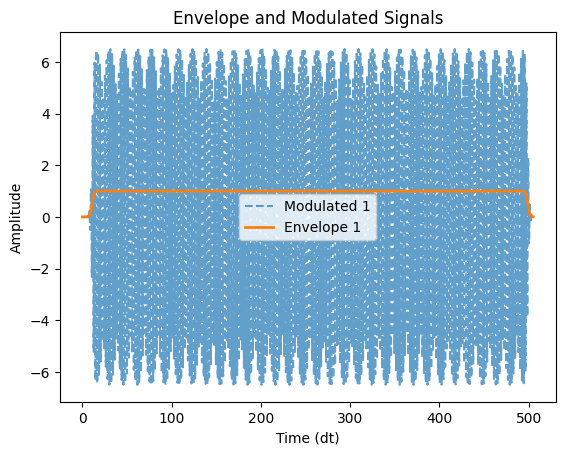

In [78]:
# Step 3. construct the pump term
# Define experiment constants
# define frequency and amplitude ranges
# drive at qubit-qubit conversion with some detuning
width_d = 500
N = 15

detuning_flist = 1000 * np.linspace(-0.005, 0.002, N)  # MHz
flist = 2 * np.pi / 1000 * (detuning_flist) + abs(qubit1.freq - qubit2.freq)
alist = np.linspace(4, 9, N)
args = {
    "shape": Pulse.smoothbox,
    "shape_params": {"t0": 5, "width": width_d},
}
t_list = np.linspace(0, 5 + width_d, 1000)

# plot an example pulse from the experiment to verify its shape
omega_p = flist[int(N / 2)]
amp_p = alist[int(N / 2)]
pulse = Pulse(omega=omega_p, amp=amp_p)

# Plot the Gaussian pulse shape
Pulse.plot_pulse([(pulse, args)], t_list)

H_pump = [pump_term, pulse.drive]

In [79]:
# # collapse operators
c_ops = []
# for mode in qs.modes:
# c_ops.append(mode.collapse_operators(qs))

In [80]:
def simulation_task(freq_amp_tuple):
    freq, amp = freq_amp_tuple
    pulse = Pulse(omega=freq, amp=amp)
    H_pump = [pump_term, pulse.drive]
    H = [H0, H_pump]

    solve_result = qt.mesolve(H, psi0, t_list, c_ops, args=args, options=opts)
    final_state = solve_result.states[-1]

    # ground_state_populations = [
    #     qs.mode_population_expectation(final_state, mode, 0) for mode in qs.modes
    # ]
    # Calculate fidelity with the expected final state
    final_state = qt.ptrace(final_state, [0, 1])
    fidelity = qt.fidelity(expected_psi, final_state)

    # Return input parameters along with the results
    return freq, amp, None, fidelity


# Prepare the parameters for parallel execution
freq_amp_pairs = [(f, a) for f in flist for a in alist]
# Run the simulations in parallel
results = qt.parallel.parallel_map(simulation_task, freq_amp_pairs, progress_bar=True)

10.2%. Run time:  34.59s. Est. time left: 00:00:05:03
20.0%. Run time:  63.60s. Est. time left: 00:00:04:14
30.2%. Run time:  92.07s. Est. time left: 00:00:03:32
40.0%. Run time: 115.57s. Est. time left: 00:00:02:53
50.2%. Run time: 142.51s. Est. time left: 00:00:02:21
60.0%. Run time: 172.39s. Est. time left: 00:00:01:54
70.2%. Run time: 197.66s. Est. time left: 00:00:01:23
80.0%. Run time: 221.37s. Est. time left: 00:00:00:55
90.2%. Run time: 248.88s. Est. time left: 00:00:00:26
100.0%. Run time: 270.55s. Est. time left: 00:00:00:00
Total run time: 270.56s


In [81]:
# Process results
# ground_state_populations = np.zeros((len(qs.modes), len(alist), len(flist)))
fidelity_matrix = np.zeros((len(alist), len(flist)))

freq_to_idx = {freq: idx for idx, freq in enumerate(flist)}
amp_to_idx = {amp: idx for idx, amp in enumerate(alist)}

# Process results with guaranteed matching of parameters and results
for result in results:
    freq, amp, populations, fidelity = result
    freq_idx = freq_to_idx[freq]
    amp_idx = amp_to_idx[amp]

    # # Store ground state populations
    # for k, pop in enumerate(populations):
    #     ground_state_populations[k, amp_idx, freq_idx] = pop

    # Store fidelity
    fidelity_matrix[amp_idx, freq_idx] = fidelity

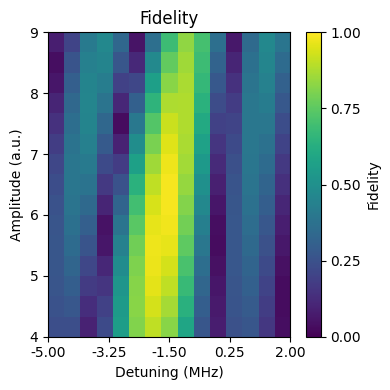

In [82]:
# Prepare the plot
# fig, axes = plt.subplots(1, len(qs.modes), figsize=(len(qs.modes) * 4, 4))

# Conversion factor from radian frequency to GHz
rad_to_GHz = 1 / (2 * np.pi)

# Define the number of ticks for the detuning x-axis
n_xticks = 5  # Adjust the number of ticks as needed

# # Plot data for each mode
# for k, mode in enumerate(qs.modes):
#     im = axes[k].imshow(
#         # ground_state_populations[k],
#         # extent=[flist[0] * rad_to_GHz, flist[-1] * rad_to_GHz, alist[0], alist[-1]],
#         extent=[detuning_flist[0], detuning_flist[-1], alist[0], alist[-1]],
#         aspect="auto",
#         origin="lower",
#         vmin=0.0,
#         vmax=1.0,  # Set color bar scale from 0.0 to 1.0
#     )
#     axes[k].set_title(f"Mode: {mode.name}")
#     # axes[k].set_xlabel("Frequency (GHz)")
#     axes[k].set_xlabel("Detuning (MHz)")
#     axes[k].set_ylabel("Amplitude (a.u.)")

#     # Customize x-axis ticks
#     # xticks = np.linspace(flist[0] * rad_to_GHz, flist[-1] * rad_to_GHz, n_xticks)
#     xticks = np.linspace(detuning_flist[0], detuning_flist[-1], n_xticks)
#     axes[k].set_xticks(xticks)
#     axes[k].set_xticklabels([f"{x:.2f}" for x in xticks])  # Format the tick labels

#     # Add color bar
#     cbar = fig.colorbar(
#         im, ax=axes[k], orientation="vertical", label="Ground State Population"
#     )
#     cbar.set_ticks(np.linspace(0, 1, 5))  # Customize color bar ticks

# plot fidelity instead
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
im = axes.imshow(
    fidelity_matrix,
    extent=[detuning_flist[0], detuning_flist[-1], alist[0], alist[-1]],
    aspect="auto",
    origin="lower",
    vmin=0.0,
    vmax=1.0,  # Set color bar scale from 0.0 to 1.0
)
axes.set_title("Fidelity")
axes.set_xlabel("Detuning (MHz)")
axes.set_ylabel("Amplitude (a.u.)")

# Customize x-axis ticks
xticks = np.linspace(detuning_flist[0], detuning_flist[-1], n_xticks)
axes.set_xticks(xticks)
axes.set_xticklabels([f"{x:.2f}" for x in xticks])  # Format the tick labels

# Add color bar
cbar = fig.colorbar(im, ax=axes, orientation="vertical", label="Fidelity")
cbar.set_ticks(np.linspace(0, 1, 5))  # Customize color bar ticks


plt.tight_layout()
plt.show()

In [83]:
# Find the pulse parameters that maximize fidelity
max_fidelity = np.max(fidelity_matrix)
max_fidelity_indices = np.where(fidelity_matrix == max_fidelity)

# # Find the pulse the maximized ground state fidelity of k=1
# # ground_state_populations[k, amp_idx, freq_idx] = pop
# max_ground_state_populations = np.max(ground_state_populations[1])
# max_ground_state_populations_indices = np.where(
#     ground_state_populations[1] == max_ground_state_populations
# )
# max_pop_amp_idx, max_pop_freq_idx = (
#     max_ground_state_populations_indices[0][0],
#     max_ground_state_populations_indices[1][0],
# )

# Retrieve the amplitude and width that correspond to the maximum fidelity
# max_pop_freq = flist[max_pop_freq_idx]
# max_pop_amp = alist[max_pop_amp_idx]

# Since the indices are returned in a tuple of arrays, we take the first element
max_fidelity_amp_idx, max_fidelity_freq_idx = (
    max_fidelity_indices[0][0],
    max_fidelity_indices[1][0],
)

# Retrieve the amplitude and width that correspond to the maximum fidelity
max_fidelity_freq = flist[max_fidelity_freq_idx]
max_fidelity_amp = alist[max_fidelity_amp_idx]

print(f"Max fidelity: {max_fidelity:.4f}")
print(f"Pulse freq for max fidelity: {max_fidelity_freq:.2f} GHz")
print(f"Pulse amplitude for max fidelity: {max_fidelity_amp:.2f} a.u.")

# print(f"Max ground state population: {max_ground_state_populations:.4f}")
# print(f"Pulse freq for max ground state population: {max_pop_freq:.2f} GHz")
# print(f"Pulse amplitude for max ground state population: {max_pop_amp:.2f} a.u.")

Max fidelity: 0.9864
Pulse freq for max fidelity: 3.21 GHz
Pulse amplitude for max fidelity: 6.14 a.u.


In [84]:
# we want to construct the observables for H0, so that the expectation values
# are the dressed states
# e_ops = [
#     qt.Qobj(eigenstate) * qt.Qobj(eigenstate).dag() for eigenstate in H0.eigenstates()
# ]

e_ops = [qs.modes_num[m] for m in qs.modes]

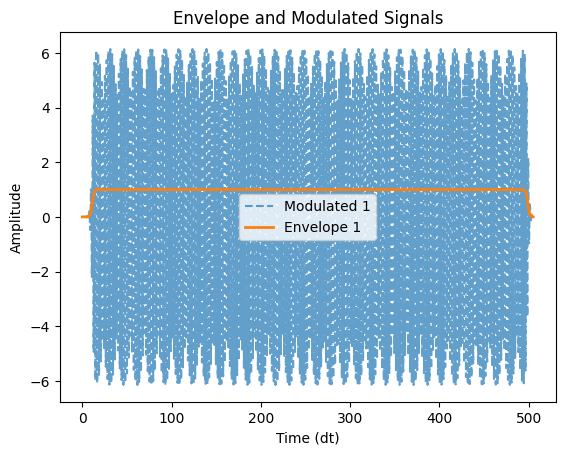

In [85]:
# pulse = Pulse(omega=max_fidelity_freq, amp=max_fidelity_amp)
pulse = Pulse(omega=max_fidelity_freq, amp=max_fidelity_amp)
Pulse.plot_pulse([(pulse, args)], t_list)

In [86]:
H_pump = [pump_term, pulse.drive]
H = [H0, H_pump]
solve_result = qt.mesolve(H, psi0, t_list, args=args, options=opts, e_ops=e_ops)

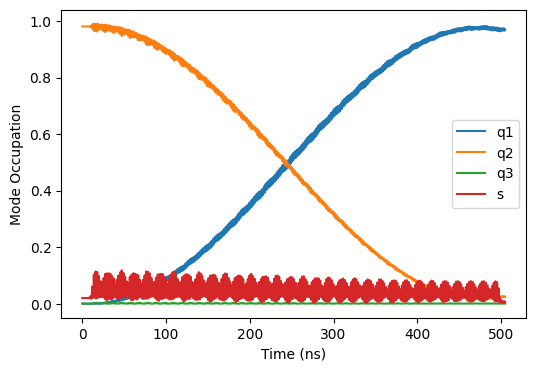

In [87]:
# Plot the state evolution (<n> vs time) for each mode (one plot total)
fig, ax = plt.subplots(figsize=(6, 4))
for k, mode in enumerate(qs.modes):
    # if k == 2:  # don't plot the SNAIL
    #     continue
    ax.plot(t_list, solve_result.expect[k], label=mode.name)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Mode Occupation")
ax.legend()
plt.show()